In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
data = pd.read_csv('/content/drive/MyDrive/computer vision/META.csv')

In [122]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,221.610001,222.380005,218.630005,219.059998,218.610764,13288900
1,2020-01-15,220.610001,221.679993,220.139999,221.149994,220.696472,10036500
2,2020-01-16,222.570007,222.630005,220.389999,221.770004,221.315216,10015300
3,2020-01-17,222.029999,222.289993,220.529999,222.139999,221.684448,15905900
4,2020-01-21,222.160004,222.369995,219.119995,221.440002,220.985901,14275800


In [123]:
length_data = len(data)
length_data

1113

In [124]:
split_ration = 0.7
length_train = round(length_data*0.7) #779, number of train samples.
length_validation = length_data - length_train #334, number of test samples.
length_validation

334

In [125]:
train_data = data[:length_train].iloc[:, :2]
train_data

,Date,Open
0,2020-01-14,221.610001
1,2020-01-15,220.610001
2,2020-01-16,222.570007
3,2020-01-17,222.029999
4,2020-01-21,222.160004
...,...,...
774,2023-02-09,186.130005
775,2023-02-10,176.350006
776,2023-02-13,178.220001
777,2023-02-14,177.160004


In [126]:
dataset_train = train_data.Open.values
dataset_train = np.reshape(dataset_train, (-1, 1))
dataset_train

array([[221.610001],
       [220.610001],
       [222.570007],
       [222.029999],
       [222.160004],
       [222.309998],
       [220.75    ],
       [220.800003],
       [213.100006],
       [216.139999],
       [221.440002],
       [206.529999],
       [208.429993],
       [203.440002],
       [206.619995],
       [212.509995],
       [210.470001],
       [210.300003],
       [211.520004],
       [210.190002],
       [207.850006],
       [209.520004],
       [214.      ],
       [213.550003],
       [217.990005],
       [216.520004],
       [213.479996],
       [201.800003],
       [202.25    ],
       [197.190002],
       [191.820007],
       [182.699997],
       [194.029999],
       [196.220001],
       [189.169998],
       [186.779999],
       [178.330002],
       [169.600006],
       [174.669998],
       [174.009995],
       [159.539993],
       [163.529999],
       [152.320007],
       [150.740005],
       [139.75    ],
       [146.619995],
       [156.020004],
       [149.6

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

dataset_train_scaled = scaler.fit_transform(dataset_train)

In [128]:
dataset_train.shape

(779, 1)

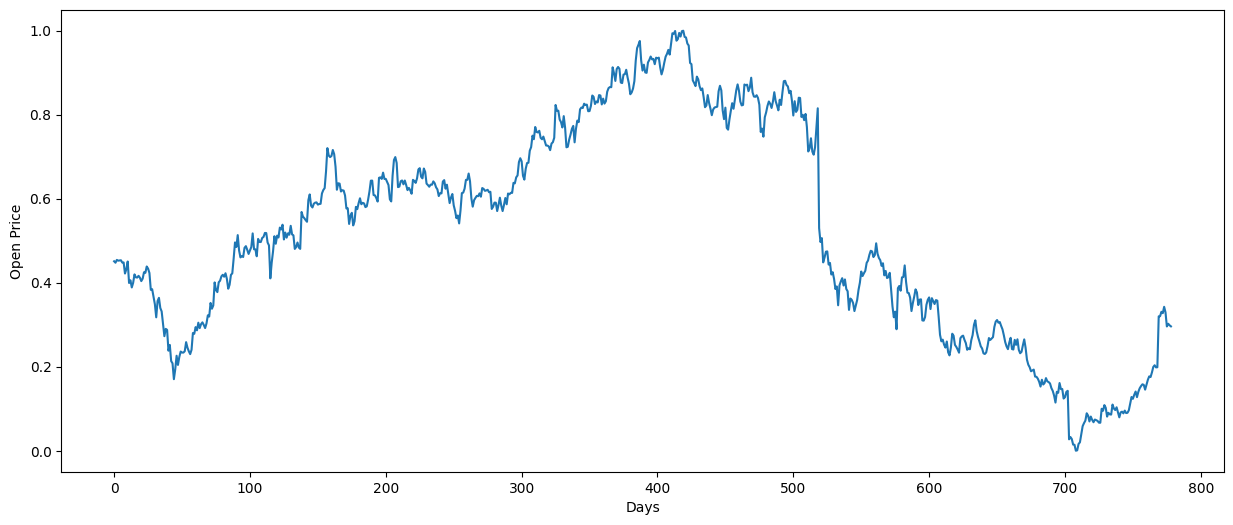

In [129]:
plt.subplots(figsize=(15, 6))
plt.plot(dataset_train_scaled)
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [130]:
x_train = []
y_train = []

time_step = 50
for i in range(time_step, length_train):
    # i=50
    # i-time_step = 50-50 = 0

    x_train.append(dataset_train_scaled[i-time_step:i, 0]) #first_iteration: [0, 50]
    y_train.append(dataset_train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [131]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))
print(x_train.shape)
print(y_train.shape)

(729, 50, 1)
(729, 1)


In [132]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [133]:
model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))

In [134]:
model.add(Dense(units=1))

In [135]:
model.compile(optimizer='adam', loss="mse", metrics="accuracy")
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
23/23 [==============================] - 17s 163ms/step - loss: 0.0839 - accuracy: 0.0027
Epoch 2/50
23/23 [==============================] - 3s 134ms/step - loss: 0.0187 - accuracy: 0.0027
Epoch 3/50
23/23 [==============================] - 3s 139ms/step - loss: 0.0119 - accuracy: 0.0027
Epoch 4/50
23/23 [==============================] - 4s 197ms/step - loss: 0.0102 - accuracy: 0.0027
Epoch 5/50
23/23 [==============================] - 4s 160ms/step - loss: 0.0096 - accuracy: 0.0027
Epoch 6/50
23/23 [==============================] - 3s 133ms/step - loss: 0.0085 - accuracy: 0.0027
Epoch 7/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0085 - accuracy: 0.0027
Epoch 8/50
23/23 [==============================] - 4s 177ms/step - loss: 0.0071 - accuracy: 0.0027
Epoch 9/50
23/23 [==============================] - 4s 167ms/step - loss: 0.0066 - accuracy: 0.0027
Epoch 10/50
23/23 [==============================] - 3s 133ms/step - loss: 0.0066 - accuracy: 0.002

In [136]:
y_pred = model.predict(x_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred

23/23 [==============================] - 5s 42ms/step


array([[150.67387 ],
       [148.57835 ],
       [147.6119  ],
       [147.75208 ],
       [148.89572 ],
       [150.85149 ],
       [153.3486  ],
       [156.06216 ],
       [158.68051 ],
       [161.05907 ],
       [163.18204 ],
       [165.17235 ],
       [167.20859 ],
       [169.37819 ],
       [171.72319 ],
       [174.17557 ],
       [176.62944 ],
       [178.96605 ],
       [181.02957 ],
       [182.70145 ],
       [183.97513 ],
       [184.92815 ],
       [185.73505 ],
       [186.58287 ],
       [187.61787 ],
       [189.00923 ],
       [190.90561 ],
       [193.31769 ],
       [196.17271 ],
       [199.30934 ],
       [202.58583 ],
       [205.86234 ],
       [208.9979  ],
       [211.83809 ],
       [214.26923 ],
       [216.11899 ],
       [217.22986 ],
       [217.6339  ],
       [217.52419 ],
       [217.25424 ],
       [217.35846 ],
       [218.30768 ],
       [220.37587 ],
       [223.50948 ],
       [227.21635 ],
       [230.84338 ],
       [233.77728 ],
       [235.7

In [137]:
y_train = scaler.inverse_transform(y_train)

In [138]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dropout, Dense, Bidirectional

# model1 = Sequential()

# # Adding a Bidirectional LSTM layer
# model1.add(Bidirectional(LSTM(units=50, activation='tanh', return_sequences=True), input_shape=(x_train.shape[1], 1)))
# model1.add(Dropout(0.1))

# # Adding more LSTM layers
# model1.add(Bidirectional(LSTM(units=50, activation='tanh', return_sequences=True)))
# model1.add(Dropout(0.1))

# model1.add(Bidirectional(LSTM(units=50, activation='tanh', return_sequences=True)))
# model1.add(Dropout(0.3))

# # Adding another LSTM layer without return_sequences
# model1.add(Bidirectional(LSTM(units=50)))
# model1.add(Dropout(0.3))

# # Adding Dense layers for further refinement
# model1.add(Dense(units=50, activation='relu'))
# model1.add(Dropout(0.3))
# model1.add(Dense(units=1, activation='linear'))

# model1.compile(optimizer='adam', loss='mean_squared_error')
# history = model1.fit(x_train, y_train, epochs=50, batch_size=32)

In [139]:
# y_pred = model1.predict(x_train)
# y_pred = scaler.inverse_transform(y_pred)

# y_train = scaler.inverse_transform(y_train)
# y_pred

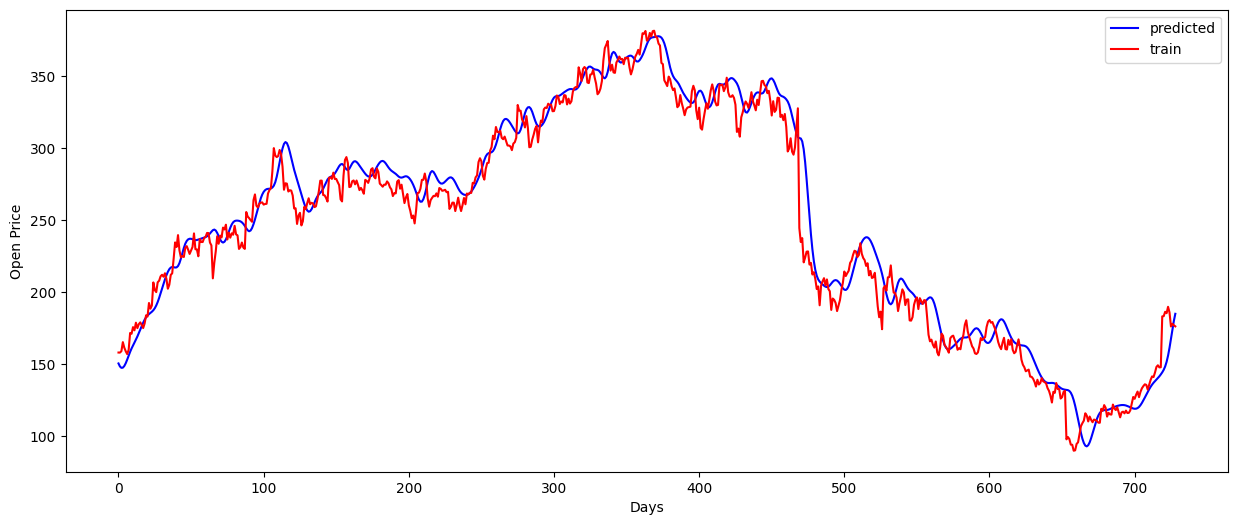

In [140]:
plt.subplots(figsize=(15, 6))
plt.plot(y_pred, color='b', label='predicted')
plt.plot(y_train, color='r', label='train')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [141]:
x_input = data.iloc[-50:].Open.values
x_input = scaler.fit_transform(x_input.reshape(-1, 1))
x_input = np.reshape(x_input, (-1, 50, 1))
x_input.shape
x_input

array([[[0.88487171],
        [1.        ],
        [0.93464918],
        [0.81470139],
        [0.92426732],
        [0.89312175],
        [0.88357384],
        [0.71106754],
        [0.75732282],
        [0.72691868],
        [0.75454178],
        [0.63329611],
        [0.64747853],
        [0.80329974],
        [0.        ],
        [0.18594726],
        [0.16833517],
        [0.08945116],
        [0.06674091],
        [0.16166107],
        [0.22738219],
        [0.31683335],
        [0.4161105 ],
        [0.39024835],
        [0.45050047],
        [0.51622158],
        [0.47599174],
        [0.38904326],
        [0.49666296],
        [0.49684824],
        [0.45819408],
        [0.4500371 ],
        [0.4238041 ],
        [0.43075627],
        [0.47719683],
        [0.42843888],
        [0.51149402],
        [0.49369663],
        [0.46598074],
        [0.41156822],
        [0.45847214],
        [0.51538736],
        [0.58444566],
        [0.66351496],
        [0.69067469],
        [0

In [142]:
meta_stock_forcating_for_Jun_17 = model.predict(x_input)

1/1 [==============================] - 0s 59ms/step


In [143]:
meta_stock_forcating_for_Jun_17_open_price = scaler.inverse_transform(meta_stock_forcating_for_Jun_17)
print(meta_stock_forcating_for_Jun_17_open_price[0, 0])

499.7502
